In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
directories = [
    "L:/DATA/ISIS/ISIS_Test_Data_Analysis/BATCH_1/05_results",
    "L:/DATA/ISIS/ISIS_Test_Data_Analysis/BATCH_2/05_results",
    "L:/DATA/ISIS/ISIS_Test_Data_Analysis/BATCH_3/05_results"
]

In [3]:
merged_df = pd.DataFrame()

### Merging ISIS B raw data

In [4]:
for directory in directories:
    
    for root, _, files in os.walk(directory):
        for filename in files:
            
            if ("ISIS B" in filename or "ISIS-B" in filename) and filename.endswith(".csv"):
                
                file_path = os.path.join(root, filename)
                
                df = pd.read_csv(file_path)
                
                merged_df = pd.concat([merged_df, df], ignore_index=True)


merged_df.to_csv("L:/DATA/ISIS/ISIS_Test_Data_Analysis/ISISB_merged_data.csv", index=False)

print("Merging complete. The merged file is saved as 'ISISB_merged_data.csv.csv'.")


Merging complete. The merged file is saved as 'ISISB_merged_data.csv.csv'.


### Merging ISIS A raw data

In [5]:
for directory in directories:
   
    for root, _, files in os.walk(directory):
        for filename in files:
           
            if ("ISIS A" in filename or "ISIS-A" in filename) and filename.endswith(".csv"):
              
                file_path = os.path.join(root, filename)
               
                df = pd.read_csv(file_path)
               
                merged_df = pd.concat([merged_df, df], ignore_index=True)


merged_df.to_csv("L:/DATA/ISIS/ISIS_Test_Data_Analysis/ISISA_merged_data.csv", index=False)

print("Merging complete. The merged file is saved as 'ISISA_merged_data.csv.csv'.")


Merging complete. The merged file is saved as 'ISISA_merged_data.csv.csv'.


### General QA

In [6]:
df1 = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Data_Analysis/ISISA_merged_data.csv')
df2 = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Data_Analysis/ISISB_merged_data.csv')

In [17]:
total_rows1 = len(df1)
total_rows2 = len(df2)
print(f'The total number of rows in the dataset for ISIS A: {total_rows1}')
print(f'The total number of rows in the dataset for ISIS B: {total_rows2}')

The total number of rows in the dataset for ISIS A: 1364780
The total number of rows in the dataset for ISIS B: 637095


In [18]:
# Count the number of empty (NaN or empty string) values
empty_count1 = df1['detected_point'].isna().sum() + (df1['detected_point'] == '').sum()
empty_count2 = df2['detected_point'].isna().sum() + (df2['detected_point'] == '').sum()

print(f'The number of times detected_point is empty for ISIS A: {empty_count1}')
print(f'The number of times detected_point is empty for ISIS B: {empty_count2}')

The number of times detected_point is empty for ISIS A: 1242286
The number of times detected_point is empty for ISIS B: 618837


In [19]:
percentage_empty1 = (empty_count1 / total_rows1) * 100
percentage_empty2 = (empty_count2 / total_rows2) * 100
print(f'The percentage of empty detected_point values for ISIS A: {percentage_empty1:.2f}%')
print(f'The percentage of empty detected_point values for ISIS B: {percentage_empty2:.2f}%')

The percentage of empty detected_point values for ISIS A: 91.02%
The percentage of empty detected_point values for ISIS B: 97.13%


In [21]:
Processed_data1 = total_rows1 - empty_count1
Processed_data2 = total_rows2 - empty_count2
print(f'The number of processed data for ISIS A: {empty_count1}')
print(f'The number of processed data for ISIS B: {empty_count2}')

The number of processed data for ISIS A: 1242286
The number of processed data for ISIS B: 618837


## Overall Distribution of  ISIS A and B data based on max_corr (Both processed and not processed)

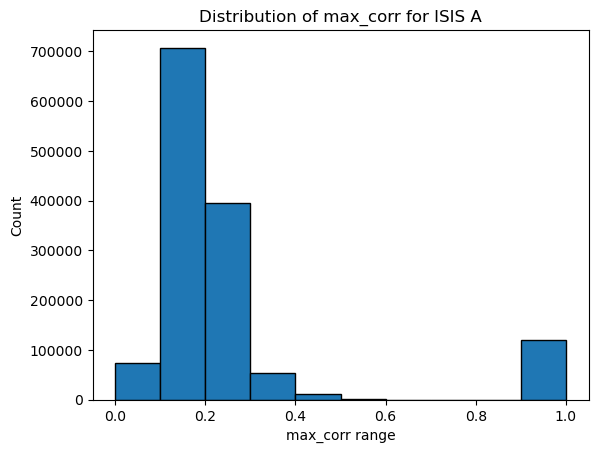

In [14]:
plt.hist(df1['max_corr'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], edgecolor='black')

plt.title('Distribution of max_corr for ISIS A')
plt.xlabel('max_corr range')
plt.ylabel('Count')

plt.show()

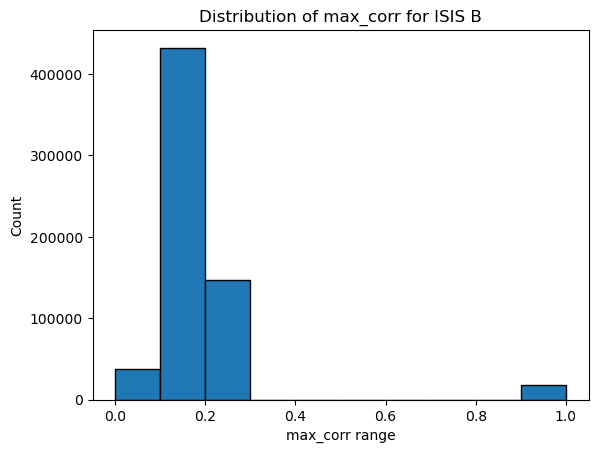

In [16]:
plt.hist(df2['max_corr'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], edgecolor='black')

plt.title('Distribution of max_corr for ISIS B')
plt.xlabel('max_corr range')
plt.ylabel('Count')

plt.show()

### Overall distribution of ISIS A and ISIS B processed data

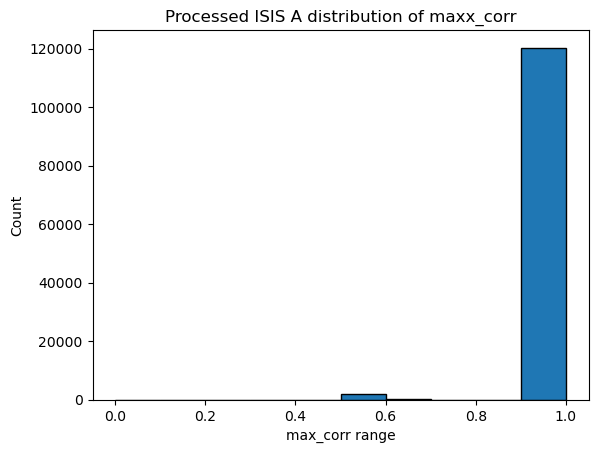

In [25]:
filtered_df1 = df1[df1['detected_point'].notna() & (df1['detected_point'] != '')]


plt.hist(filtered_df1['max_corr'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], edgecolor='black')


plt.title('Processed ISIS A distribution of maxx_corr')
plt.xlabel('max_corr range')
plt.ylabel('Count')

plt.show()

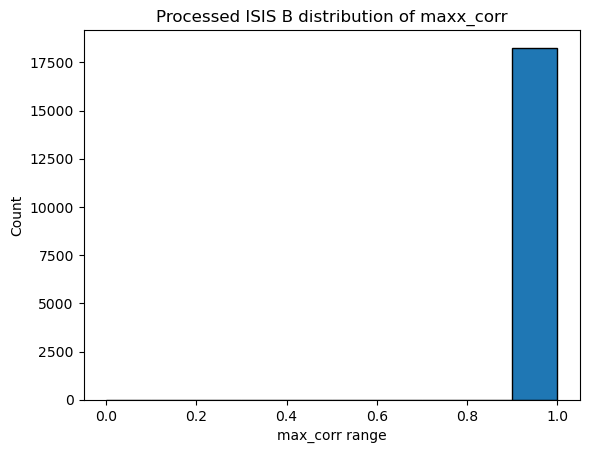

In [26]:
filtered_df2 = df2[df2['detected_point'].notna() & (df2['detected_point'] != '')]


plt.hist(filtered_df2['max_corr'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], edgecolor='black')


plt.title('Processed ISIS B distribution of maxx_corr')
plt.xlabel('max_corr range')
plt.ylabel('Count')

plt.show()